In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d_path = r'C:\Users\evere\OneDrive\Data\Concrete\Concrete_Data.xls'
data = pd.read_excel(d_path)

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
new_col_names = ['Cement','BlastFurnaceSlag','FlyAsh','Water','Superplasticizer',
                'CoarseAgg','FineAgg','AgeDay','CC_Strength']

current_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(current_col_names):
    mapper[name] = new_col_names[i]

In [5]:
data = data.rename(columns=mapper)

In [6]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAgg,FineAgg,AgeDay,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAgg           0
FineAgg             0
AgeDay              0
CC_Strength         0
dtype: int64

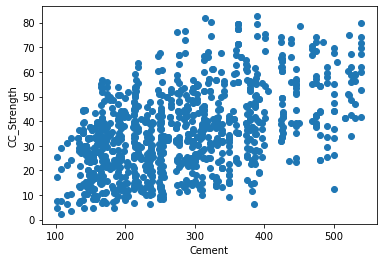

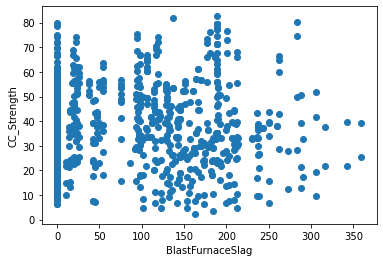

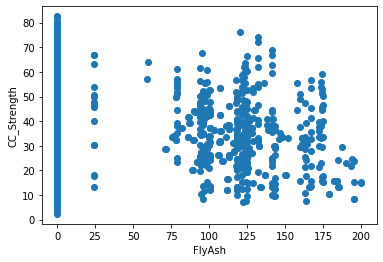

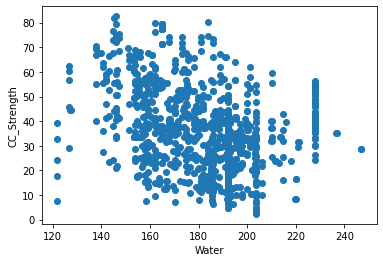

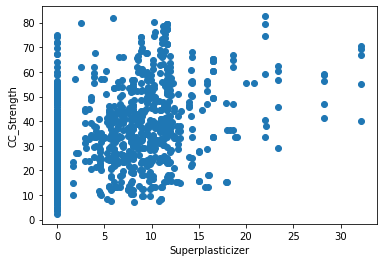

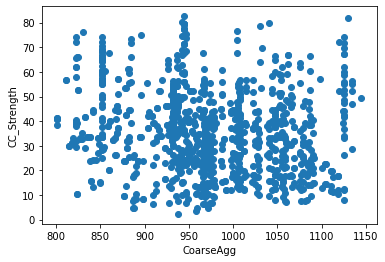

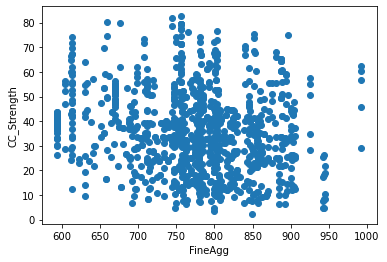

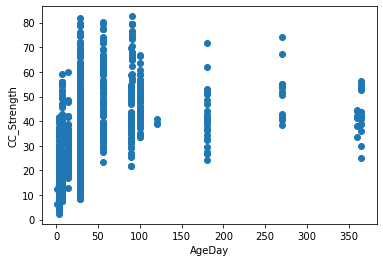

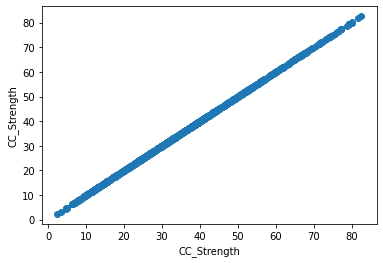

In [12]:
for features in data.columns:
    plt.scatter(x=data[features],y=data['CC_Strength'])
    plt.xlabel(features)
    plt.ylabel('CC_Strength')
    plt.show()

<AxesSubplot:>

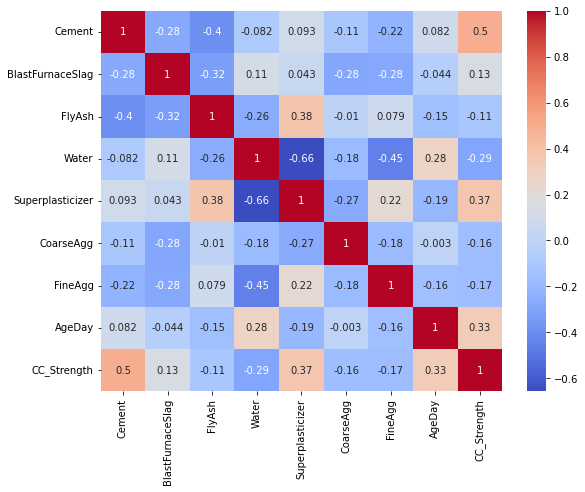

In [16]:
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()

lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

Text(0.5, 1.0, 'Ridge Regression')

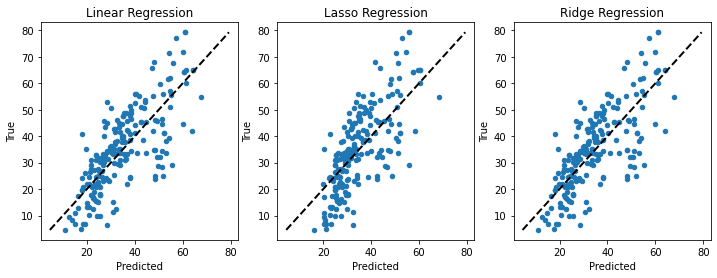

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

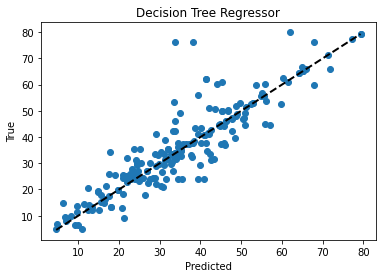

In [28]:
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

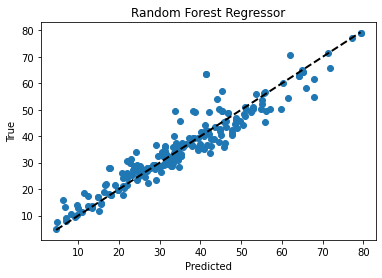

In [31]:
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))



Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.29 		 105.78 	8.23 		0.57
LassoRegression 	 10.68 		 114.13 	8.66 		0.54
RidgeRegression 	 10.29 		 105.86 	8.24 		0.57


In [33]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))


Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.32 		 53.65 		4.46 		0.78


In [35]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.96 		 24.62 		3.48 		0.90
